In [1]:
# Load the numpy libraries
import numpy as np

# load data files

# subdirectory with the module data
path = "data/13_09_2021_ColdTests/"
sensor = "0-0"
trim0MeanFile = path + "Module0_VP"+sensor+"_Trim0_Noise_Mean.csv"
trimFMeanFile = path + "Module0_VP"+sensor+"_TrimF_Noise_Mean.csv"
trim0WidthFile = path + "Module0_VP"+sensor+"_Trim0_Noise_Width.csv"
trimFWidthFile = path + "Module0_VP"+sensor+"_TrimF_Noise_Width.csv"
maskFile = path + "Module0_VP"+sensor+"_Matrix_Mask.csv"
trimFile = path + "Module0_VP"+sensor+"_Matrix_Trim.csv"

tMean0 = np.genfromtxt(trim0MeanFile,delimiter=",").astype(np.float16).reshape(256*256)
tMeanF = np.genfromtxt(trimFMeanFile,delimiter=",").astype(np.float16).reshape(256*256)
tWidth0 = np.genfromtxt(trim0WidthFile,delimiter=",").astype(np.float16).reshape(256*256)
tWidthF = np.genfromtxt(trimFWidthFile,delimiter=",").astype(np.float16).reshape(256*256)
mask = np.genfromtxt(maskFile,delimiter=",").astype(np.float16).reshape(256*256)
trim = np.genfromtxt(trimFile,delimiter=",").reshape(256*256).astype(np.int8)

#replace nan values to avoid crash later on
np.nan_to_num(tMean0, nan=0, copy=False)
np.nan_to_num(tMeanF, nan=0, copy=False)
np.nan_to_num(tWidth0, nan=0, copy=False)
np.nan_to_num(tWidthF, nan=0, copy=False)
np.nan_to_num(mask, nan=0, copy=False)
np.nan_to_num(trim, nan=0, copy=False)

array([ 4,  9,  6, ...,  8, 10,  8], dtype=int8)

In [35]:
# Check what we loaded
%whos

Variable                Type                  Data/Info
-------------------------------------------------------
BatchNormalization      type                  <class 'tensorflow.python<...>n_v2.BatchNormalization'>
Dense                   type                  <class 'tensorflow.python<...>keras.layers.core.Dense'>
EarlyStopping           type                  <class 'tensorflow.python<...>callbacks.EarlyStopping'>
Input                   function              <function Input at 0x0000017DDE3B6EE0>
LogNorm                 type                  <class 'matplotlib.colors.LogNorm'>
Model                   type                  <class 'tensorflow.python<...>s.engine.training.Model'>
activationFunc          str                   relu
ax0                     AxesSubplot           AxesSubplot(0.0442057,0.3<...>56021;0.0738823x0.295529)
ax1                     AxesSubplot           AxesSubplot(0.18655,0.145139;0.0923528x0.717293)
ax2                     AxesSubplot           AxesSubplot(0.32889

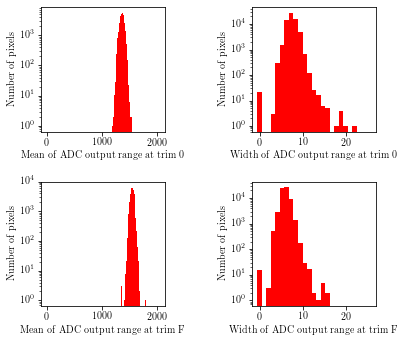

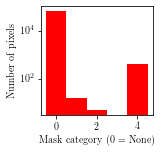

In [27]:
# Now plot the data to see what we have
from matplotlib import pyplot as plt
from matplotlib import rc, transforms
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

oneSize = 256*256 # size of one input array
fig, ((ax2, ax4), (ax3, ax5)) = plt.subplots(2,2, figsize=(6,5.5))
plt.subplots_adjust(wspace=0.7, hspace=0.4)
#plt.suptitle("Histograms showing VP"+sensor+" sensor pixel test data")

# img = ax0.imshow(trim.reshape(256,256)) # convert back to square array
# ax0.set_title("Final Trim")
# ax0.set_xlabel('256 Rows')
# ax0.set_ylabel('256 Columns')
# fig.colorbar(img, ax=ax0)

# ax1.hist(trim,bins=np.arange(-0.5,15.5))
# ax1.set_xlabel('Final Trim')

ax2.hist(tMean0, bins=np.linspace(-0.5,2047.5,256), label = "Mean of ADC output range at trim 0", color="r")
#ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel("Mean of ADC output range at trim 0")
ax2.set_ylabel('Number of pixels')

ax3.hist(tMeanF, bins=np.linspace(-0.5,2047.5,256), label = "Mean of ADC output range at trim F", color="r")
#ax3.legend()
ax3.set_yscale('log')
ax3.set_xlabel("Mean of ADC output range at trim F")
ax3.set_ylabel('Number of pixels')

ax4.hist(tWidth0, bins=np.linspace(-0.5,25.5,26), label = "Width of ADC output range at trim 0", color="r")
#ax4.legend()
ax4.set_yscale('log')
ax4.set_xlabel("Width of ADC output range at trim 0")
ax4.set_ylabel('Number of pixels')

ax5.hist(tWidthF, bins=np.linspace(-0.5,25.5,26), label = "Width of ADC output range at trim F", color="r")
#ax5.legend()
ax5.set_yscale('log')
ax5.set_xlabel("Width of ADC output range at trim F")
ax5.set_ylabel('Number of pixels')

# ax6.hist(mask, label = "Mask",  bins = np.arange(-0.5,5.5))
# ax6.set_yscale('log')
# ax6.set_xlabel('Masked pixel param')
# ax6.legend()


#plt.tight_layout()
plt.savefig("dataPlots/VP"+sensor+"testData.pdf", bbox_inches=transforms.Bbox([[0,0.2], [6,5]]))
plt.show()

plt.figure(figsize=(2,2))
plt.hist(mask, label = "Mask",  bins = np.arange(-0.5,5.5), color="r")
plt.yscale('log')
plt.xlabel('Mask category (0 = None)')
plt.ylabel('Number of pixels')
plt.savefig("dataPlots/VP"+sensor+"mask.pdf", bbox_inches=transforms.Bbox([[-0.4,-0.2], [2.5,1.9]]))
plt.show()

# from matplotlib import pyplot as plt
# from matplotlib import rc
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)

# plt.figure(figsize=(6,6))
# img = plt.imshow(trim.reshape(256,256),interpolation='none') # convert back to square array
# plt.xlabel("256 pixel columns")
# plt.ylabel("256 pixel rows")
# plt.title("VP0-0 sensor pre-calculated trim values")
# plt.colorbar(img, location="bottom")
# plt.savefig("dataPlots/VP"+sensor+"_true_trims.pdf")
# plt.show()

326


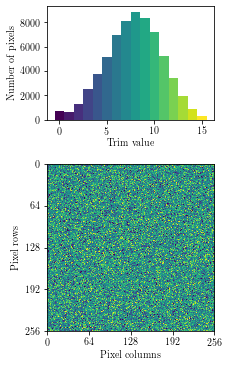

In [28]:
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


fig, (ax0, ax2) = plt.subplots(2,1, figsize=(3,6), gridspec_kw={'height_ratios': [2,3]})
plt.subplots_adjust(wspace=0.0, hspace=0.3)
#plt.suptitle("VP0-0 sensor pre-calculated trim values")

print(np.count_nonzero(trim==15))

n, bins, patches= ax0.hist(trim,bins=np.arange(16+1)-0.5, color="red")
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', plt.cm.get_cmap('viridis')(c))

ax0.set_xlabel('Trim value')
ax0.set_ylabel('Number of pixels')
ax0.set_xticks(ticks=[0,5,10,15])

img = ax2.imshow(trim.reshape(256,256),interpolation='none') # convert back to square array
ax2.set_xlabel("Pixel columns")
ax2.set_ylabel("Pixel rows")
ax2.set_xticks(ticks=[0,64,128,192,256])
ax2.set_yticks(ticks=[0,64,128,192,256])
# colorbar = plt.colorbar(img, orientation="horizontal", ticks=[0,5,10,15], cax=ax1, pad=0.5)
# colorbar.set_label("Trim value")
plt.savefig("dataPlots/VP"+sensor+"_true_trims.pdf", bbox_inches="tight")
plt.show()

In [20]:
# estimate trim values from trim0, trimF and mask using a NN
# Define x as training data, y as output required, need to merge variables into one array
# Input data is each value of tMean0, tMeanF, tWidth0, tWidthF and mask

x_all = np.column_stack([tMean0, tMeanF, tWidth0, tWidthF, mask])

# Output data to optimise the NN to find is the trim value
y_all = trim

dataLen = x_all.shape[0]
nVars = x_all.shape[1]
print(f"dataLen = {dataLen}, nVars = {nVars}")
# even half as training
x_data = x_all[::2]
y_data = y_all[::2]

# odd half as evaluation
x_eval = x_all[1::2] 
y_eval = y_all[1::2] 

dataLen = 65536, nVars = 5


In [38]:

# Simple 3 layer Keras network:
# See https://keras.io/ for details of the package
# import Keras overall
import keras
# input normalization layer [fixes input variables to useful range]
from keras.layers import BatchNormalization
# a single NN layer of type "Dense" i.e. all inputs connected to all outputs
from keras.layers import Dense
# The input layer, takes x and starts NN processing
from keras.layers import Input
# Keras functional methods for defining a NN model
from keras.models import Model

# define a Functional keras NN model

# An "adapt" layer which normalizes data as required
norm = BatchNormalization()

# define input layer
nVal = x_data.shape[1]
inputs = Input(shape=(nVal,)) 
# apply normalization 
iLayer = norm(inputs)
# input->internal layer with nVal nodes (iLayer at end means input is iLayer)
#'hidden' nodes often use relu
#iLayer = Dense(nVal, activation='relu')(iLayer)

#iLayer = Dense(250, activation='relu')(iLayer)

nNodes = 250
activationFunc = 'relu'
iLayer = Dense(nNodes, activation=activationFunc)(iLayer)



# prev layer -> output (16 nodes, one for each trim level)
output = Dense(16, activation='softmax')(iLayer) #softmax assigns a decimal probability to each class (0 to 16)
# a model is created from connecting all the layers from input to output
model = Model(inputs=inputs, outputs=output)
# Compiling the model sets up how to optimise it
model.compile(optimizer=keras.optimizers.get("Adam"),  # Specific minimiser routine
              loss=keras.losses.SparseCategoricalCrossentropy(), # define loss function to minimize
              metrics=[keras.metrics.SparseCategoricalAccuracy()]) # what to store at each step

# run an evaluation before optimization to see what the random initialization
# gave as an output
score = model.evaluate(x_eval, y_eval, verbose=1)
print('Initial loss: {:7.4f} with the random starting network'.format(score[0]))
print('Initial accuracy: {:7.4f}, expect 1/16 = 0.06 by chance'.format(score[1]))


1024/1024 [==============================] - 1s 999us/step - loss: 306.7214 - sparse_categorical_accuracy: 0.0022
Initial loss: 306.7214 with the random starting network
Initial accuracy:  0.0022, expect 1/16 = 0.06 by chance


In [39]:
# Choose a batch size 
batchSize = 256*128
maxEpochs = 2000#10000
# Rather than run a fixed number of rounds, stop when the output stops improving
from keras.callbacks import EarlyStopping
# stop training early if after N iterations the result has not improved
early_stopping = EarlyStopping(monitor="loss", patience=5)

#record start time
from datetime import datetime
startTime = datetime.now()
# Now run the optimization, taking events from the generator
# Each epoch is one pass through the data, if not stopped do 20 epochs
history=model.fit(x=x_data,y=y_data,batch_size=batchSize,
                  verbose=1,
                  epochs=maxEpochs,
                  shuffle=True, # not strictly needed but good practice
                  callbacks=[early_stopping])
#record stop time and accuracy at final epoch
stopTime = datetime.now()
finalAccuracy = float(model.metrics[1].result())
print("Stopped after ",history.epoch[-1]," epochs")



Epoch 1/2000
1/1 [==============================] - 0s 998us/step - loss: 2.7859 - sparse_categorical_accuracy: 0.0836
Epoch 2/2000
1/1 [==============================] - 0s 1ms/step - loss: 2.7640 - sparse_categorical_accuracy: 0.1004
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.7423 - sparse_categorical_accuracy: 0.1255
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.7210 - sparse_categorical_accuracy: 0.1612
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 2.6999 - sparse_categorical_accuracy: 0.1998
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.6791 - sparse_categorical_accuracy: 0.2279
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.6586 - sparse_categorical_accuracy: 0.2414
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.6383 - sparse_categorical_accuracy: 0.2508
Epoch 9/2000
1/1 [==============================] - 0s 2ms/ste

In [40]:
score = model.evaluate(x_eval, y_eval)
print('Final loss: {:7.4f} with the trained network'.format(score[0]))
print('Final accuracy: {:7.4f}, 1 = perfect'.format(score[1]))
print("Example output:")
pred = model.predict(x_eval)
def confidence(pred):
    """Assuming a one-hot vector, largest val = prediction, confidence = largest/sum"""
    return np.max(pred)/np.sum(pred)
print("Input, true output, best guess from network, 'confidence'")
for i in range(10):
    print(x_eval[i],',',y_eval[i],',',np.argmax(pred[i]),',',confidence(pred[i]))
    #print(pred[i])


1024/1024 [==============================] - 2s 2ms/step - loss: 0.0974 - sparse_categorical_accuracy: 0.9716
Final loss:  0.0974 with the trained network
Final accuracy:  0.9716, 1 = perfect
Example output:
Input, true output, best guess from network, 'confidence'
[1384.   1598.      6.76    6.12    0.  ] , 6 , 6 , 0.99998975
[1354.   1565.      5.9     5.63    0.  ] , 8 , 8 , 0.99941766
[1369.   1561.      6.17    5.29    0.  ] , 8 , 8 , 0.9999473
[1370.   1577.      6.65    5.66    0.  ] , 7 , 7 , 0.99991393
[1305.   1506.      6.4     5.41    0.  ] , 13 , 13 , 0.78773636
[1388.   1577.      6.44    5.55    0.  ] , 6 , 6 , 0.96479744
[1333.   1532.      6.58    5.15    0.  ] , 11 , 10 , 0.55368626
[1336.   1521.      6.81    5.47    0.  ] , 11 , 11 , 0.99975604
[1311.   1522.      7.04    5.03    0.  ] , 12 , 12 , 0.8239434
[1388.   1564.      6.45    5.83    0.  ] , 7 , 7 , 0.99986696


In [41]:
#collect metrics
layerSummary = []
model.summary(print_fn=lambda x: layerSummary.append(x))
metrics = {
    "sensor":"VP"+sensor,
    "hiddenLayers":("|".join(layerSummary[8:-7])).replace(",","[comma]"),
    "batchSize":batchSize,
    "batchSizeAsFraction": batchSize/len(x_data),
    "epochs": history.epoch[-1],
    "trainingTimeSeconds": (stopTime - startTime).total_seconds(),
    "finalSparseCategoricalAccuracy": finalAccuracy,
    "evaluatedAccuracy": score[1],
    "nodes":nNodes,
    "layers":"?",
    "activationFunction":activationFunc
}

storeMetrics = True
metricsFile = 'metrics/metrics.csv'

if storeMetrics:
    import csv
    import os
    if os.path.isfile(metricsFile):
        with open(metricsFile, 'a', newline='') as f:#try open file
            w = csv.DictWriter(f, metrics.keys())
            w.writerow(metrics)
    else:
        with open(metricsFile, 'w', newline='') as f:#otherwise create file, write headers
            w = csv.DictWriter(f, metrics.keys())
            w.writeheader()
            w.writerow(metrics)

Confusion Matrix


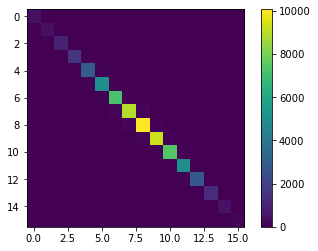

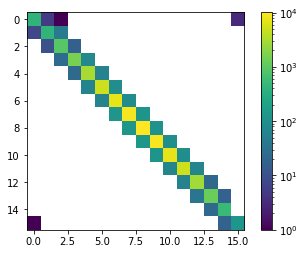

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       405
           1       0.97      0.89      0.93       469
           2       0.93      0.97      0.95       950
           3       0.97      0.94      0.96      1648
           4       0.95      0.97      0.96      3047
           5       0.98      0.97      0.97      5080
           6       0.97      0.98      0.98      7342
           7       0.98      0.97      0.97      9197
           8       0.98      0.98      0.98     10314
           9       0.98      0.98      0.98      9549
          10       0.98      0.97      0.98      7575
          11       0.97      0.97      0.97      5094
          12       0.96      0.97      0.97      2860
          13       0.97      0.96      0.96      1326
          14       0.93      0.96      0.95       534
          15       0.98      0.87      0.92       146

    accuracy                           0.97     65536
   m

In [42]:
y_pred_all = model.predict(x_all)
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import LogNorm
#Confution Matrix and Classification Report
y_pred_all_best = np.argmax(y_pred_all, axis=1)
print('Confusion Matrix')
im = plt.imshow(confusion_matrix(y_all, y_pred_all_best))
plt.colorbar(im)
plt.show()
im = plt.imshow(confusion_matrix(y_all, y_pred_all_best), norm=LogNorm())
plt.colorbar(im)
plt.show()
print('Classification Report')
print(classification_report(y_all, y_pred_all_best))

In [43]:
noisyPixels = 0
deadPixels = 0

for i in range(len(y_pred_all_best)):
    if y_pred_all_best[i] == 0:
        if mask[i] != 0:
            deadPixels += 1#consider pre-masked pixels as dead to reduce noisy fraction and prevent davinci crashes
        elif mask[i] == 0:
            noisyPixels += 1#only consider a pixel noisy if it is trim 0 AND not pre-masked
#noisyPixels += np.count_nonzero(y_pred_all_best == 0)
#noisyPixels += np.count_nonzero(y_pred_all_best == 1)
#noisyPixels += np.count_nonzero(y_pred_all_best == 2)
noisyFraction = noisyPixels / len(y_pred_all_best)

#count trim 13,14,15 as dead
deadPixels += np.count_nonzero(y_pred_all_best == 15)
deadPixels += np.count_nonzero(y_pred_all_best == 14)
deadPixels += np.count_nonzero(y_pred_all_best == 13)
deadFraction = deadPixels / len(y_pred_all_best)

print(f"Noisy fraction: {noisyFraction}, dead fraction: {deadFraction}")

Noisy fraction: 0.0033416748046875, dead fraction: 0.033233642578125


In [44]:
#try model on a different data set (not successful)
# dataset = "0-1"

# path = "data/13_09_2021_ColdTests/"
# trim0MeanFile = path + "Module0_VP"+dataset+"_Trim0_Noise_Mean.csv"
# trimFMeanFile = path + "Module0_VP"+dataset+"_TrimF_Noise_Mean.csv"
# trim0WidthFile = path + "Module0_VP"+dataset+"_Trim0_Noise_Width.csv"
# trimFWidthFile = path + "Module0_VP"+dataset+"_TrimF_Noise_Width.csv"
# maskFile = path + "Module0_VP"+dataset+"_Matrix_Mask.csv"
# trimFile = path + "Module0_VP"+dataset+"_Matrix_Trim.csv"

# tMean0 = np.genfromtxt(trim0MeanFile,delimiter=",").astype(np.float16).reshape(256*256)
# tMeanF = np.genfromtxt(trimFMeanFile,delimiter=",").astype(np.float16).reshape(256*256)
# tWidth0 = np.genfromtxt(trim0WidthFile,delimiter=",").astype(np.float16).reshape(256*256)
# tWidthF = np.genfromtxt(trimFWidthFile,delimiter=",").astype(np.float16).reshape(256*256)
# mask = np.genfromtxt(maskFile,delimiter=",").astype(np.float16).reshape(256*256)
# trim = np.genfromtxt(trimFile,delimiter=",").reshape(256*256).astype(np.int8)

# x_all = np.column_stack([tMean0, tMeanF, tWidth0, tWidthF, mask])
# y_all = trim

# x_eval = x_all
# y_eval = y_all

# score = model.evaluate(x_eval, y_eval)
# print('Final loss: {:7.4f} with the trained network'.format(score[0]))
# print('Final accuracy: {:7.4f}, 1 = perfect'.format(score[1]))
# print("Example output:")
# pred = model.predict(x_eval)
# def confidence(pred):
#     """Assuming a one-hot vector, largest val = prediction, confidence = largest/sum"""
#     return np.max(pred)/np.sum(pred)
# print("Input, true output, best guess from network, 'confidence'")
# for i in range(10):
#     print(x_eval[i],',',y_eval[i],',',np.argmax(pred[i]),',',confidence(pred[i]))



# y_pred_all = model.predict(x_all)
# # confusion matrix
# from sklearn.metrics import classification_report, confusion_matrix
# from matplotlib.colors import LogNorm
# #Confution Matrix and Classification Report
# y_pred_all_best = np.argmax(y_pred_all, axis=1)
# print('Confusion Matrix')
# im = plt.imshow(confusion_matrix(y_all, y_pred_all_best))
# plt.colorbar(im)
# plt.show()
# im = plt.imshow(confusion_matrix(y_all, y_pred_all_best), norm=LogNorm())
# plt.colorbar(im)
# plt.show()
# print('Classification Report')
# print(classification_report(y_all, y_pred_all_best))
